In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thesis-benign/benign_use/ISIC_2801761.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_0375775.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_9054603.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_1691175.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_5538778.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_9996662.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_7059544.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_9089031.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_2262805.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_7011745.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_2376574.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_0265576.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_8828171.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_6556220.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_0114225.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_3609081.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_8381608.jpg
/kaggle/input/thesis-benign/benign_use/ISIC_8053

# Define Parameter

In [2]:
# number of shuffle
shuf = 10

# % of test data
test_data = 10 # 10%

# random seed
n_seed = 99

# Model Config
img_size = 225
batch_size = 16
epoch = 50 # epochs
lr = 0.0001 # Learning Rate

# Import Library

In [3]:
import matplotlib.pyplot as plt
import random
import os
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Make Directory

In [4]:
os.mkdir("train")
os.mkdir("test")

In [5]:
train_malignant = os.path.join("train", "malignant")
train_benign = os.path.join("train", "benign")
test_malignant = os.path.join("test", "malignant")
test_benign = os.path.join("test", "benign")

In [6]:
os.mkdir(train_malignant)
os.mkdir(train_benign)
os.mkdir(test_malignant)
os.mkdir(test_benign)

## Manage File to folder

In [7]:
# file name in malignant
all_malignant = os.listdir("/kaggle/input/thesis-malignant/malignant")
# file name in benign
all_benign = os.listdir("/kaggle/input/thesis-benign/benign_use")

In [8]:
# shuffle name 10 times
random.seed(n_seed)
for n in range(shuf):
    random.shuffle(all_malignant)
    random.shuffle(all_benign)
    
# calculate number of t
num_of_test_pic = round(len(all_malignant) * (test_data/100))

# select name for copy to test
name_malignant_test = all_malignant[:num_of_test_pic]
name_benign_test = all_benign[:num_of_test_pic]
print(len(name_malignant_test),len(name_benign_test))

699 699


In [9]:
# Copy file to test
for ca_name in name_malignant_test:
    path = "/kaggle/input/thesis-malignant/malignant/" + ca_name
    target_path = "/kaggle/working/test/malignant/" + ca_name
    shutil.copy(path, target_path)
    all_malignant.remove(ca_name)
for nonca_name in name_benign_test:
    path = "/kaggle/input/thesis-benign/benign_use/" + nonca_name
    target_path = "/kaggle/working/test/benign/" + nonca_name
    shutil.copy(path, target_path)
    all_benign.remove(nonca_name)
print(len(all_malignant), len(all_benign))

6294 6294


In [10]:
# Fopy file to train
for ca_name in all_malignant:
    path = "/kaggle/input/thesis-malignant/malignant/" + ca_name
    target_path = "/kaggle/working/train/malignant/" + ca_name
    shutil.copy(path, target_path)
for nonca_name in all_benign:
    path = "/kaggle/input/thesis-benign/benign_use/" + nonca_name
    target_path = "/kaggle/working/train/benign/" + nonca_name
    shutil.copy(path, target_path)
    

In [11]:
print("Number of Malignant in Train Set: ", len(os.listdir("/kaggle/working/train/malignant")))
print("Number of Malignant in Test Set: ", len(os.listdir("/kaggle/working/test/malignant")))
print("Number of Benign in Train Set: ", len(os.listdir("/kaggle/working/train/benign")))
print("Number of Benign in Test Set: ", len(os.listdir("/kaggle/working/test/benign")))

Number of Malignant in Train Set:  6294
Number of Malignant in Test Set:  699
Number of Benign in Train Set:  6294
Number of Benign in Test Set:  699


# Generate Dataset

In [12]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    validation_split = 0.15,
    subset = "both",
    seed = 999,
    image_size = (img_size,img_size),
    batch_size = batch_size
)

Found 12588 files belonging to 2 classes.
Using 10700 files for training.
Using 1888 files for validation.


# Sample Data

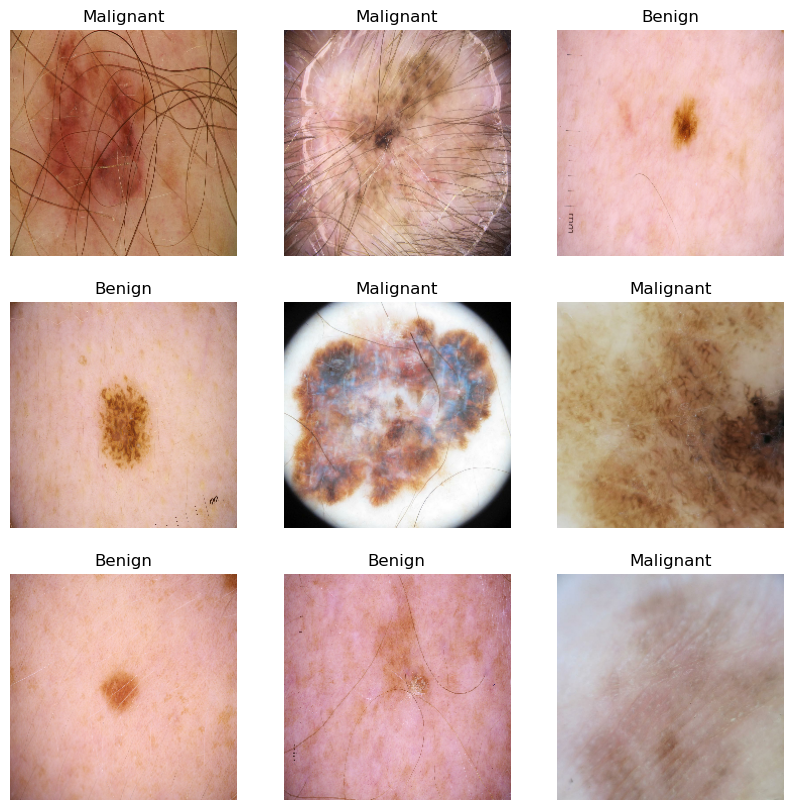

In [13]:
label_dic = {
    1 : "Malignant",
    0 : "Benign"
}
plt.figure(figsize = (10,10))
for image, label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(label_dic[int(label[i])])
        plt.axis("off")

# Augmentation Layer

In [14]:
data_augmentation = keras.Sequential(
[
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.1)
])

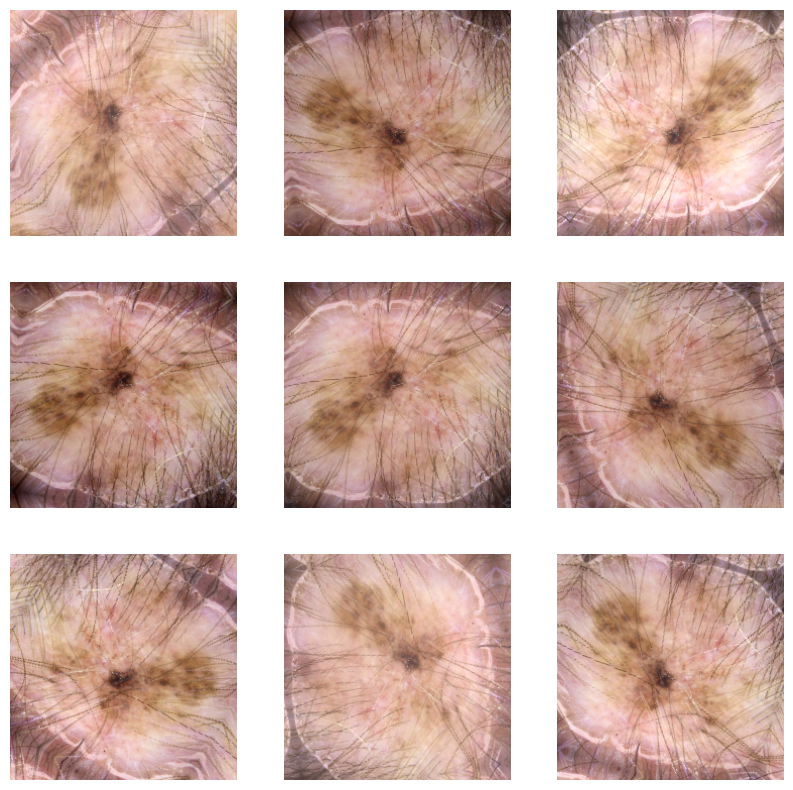

In [15]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# Load Pretrin Model

In [16]:
from keras.applications import InceptionResNetV2
pre_trained = InceptionResNetV2(include_top = False, weights = "imagenet")

219055592/219055592 [==============================] - 1s 0us/step


In [17]:
def make_model(pretrained, lr, input_shape):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = layers.Rescaling(1./255)(x)
    x = pretrained(x)
    x = layers.Conv2D(32, (3,3), activation = 'relu', padding="same")(x)
    x = layers.MaxPooling2D((2,2), padding = 'same')(x)
    x = layers.Conv2D(64, (3,3), activation = 'relu', padding="same")(x)
    x = layers.MaxPooling2D((2,2), padding = 'same')(x)
    x = layers.Conv2D(64, (3,3), activation = 'relu', padding="same")(x)
    x = layers.MaxPooling2D((2,2), padding = 'same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation = 'relu')(x)
    x = layers.Dense(32, activation = 'relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1, activation= 'sigmoid')(x)
    model = Model(inputs = inputs,outputs= x)
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
    return model
    

In [18]:
model = make_model(pre_trained, lr, (225,225,3))

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 225, 225, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 225, 225, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 225, 225, 3)       0         
                                                                 
 inception_resnet_v2 (Functi  (None, None, None, 1536)  54336736 
 onal)                                                           
                                                                 
 conv2d_203 (Conv2D)         (None, 5, 5, 32)          442400    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                         

In [20]:
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = epoch,
                    verbose=1)

Epoch 1/50
669/669 [==============================] - 623s 759ms/step - loss: 0.2948 - accuracy: 0.8799 - val_loss: 0.2122 - val_accuracy: 0.9147
Epoch 2/50
669/669 [==============================] - 512s 758ms/step - loss: 0.2239 - accuracy: 0.9187 - val_loss: 0.5914 - val_accuracy: 0.8602
Epoch 3/50
669/669 [==============================] - 515s 763ms/step - loss: 0.1876 - accuracy: 0.9286 - val_loss: 0.4066 - val_accuracy: 0.8904
Epoch 4/50
669/669 [==============================] - 515s 764ms/step - loss: 0.1723 - accuracy: 0.9366 - val_loss: 0.4181 - val_accuracy: 0.8729
Epoch 5/50
669/669 [==============================] - 512s 759ms/step - loss: 0.1625 - accuracy: 0.9416 - val_loss: 0.2575 - val_accuracy: 0.9031
Epoch 6/50
669/669 [==============================] - 525s 779ms/step - loss: 0.1537 - accuracy: 0.9437 - val_loss: 0.2353 - val_accuracy: 0.9195
Epoch 7/50
669/669 [==============================] - 514s 762ms/step - loss: 0.1466 - accuracy: 0.9460 - val_loss: 0.2458 -

KeyboardInterrupt: 

In [ ]:
history1 = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = epoch,
                    verbose=1)

In [21]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size = (img_size,img_size),
    batch_size = batch_size
)

Found 1398 files belonging to 2 classes.


In [22]:
model.evaluate(test_ds)

88/88 [==============================] - 57s 592ms/step - loss: 0.2244 - accuracy: 0.9349


[0.22442395985126495, 0.9349070191383362]